# OBJECTIVE:

Buliding a Model using Machine Learning (Supervised - as the data is a labeled) to help predict loan defaulters.

# CODE FLOW

1. Import Packages
---
2. Load Dataset

-  Statistical Analysis of Dataset
-  Descriptive Analysis of Dataset
---
3. Data Cleaning
-  Check for missing values and outliers and treat accordingly
---
4. Exploratory Data Analysis - EDA
-  Numerical Features
   - Univariate Analysis
   - Bi/Multivariate Analysis
-  Categorical Features
   - Univariate Analysis
   - Biltivariate Analysis
---
5. Feature Engineering/Data Pre-processing
-  Creating a copy of the dataset
   - Assign a variable for the Train Set
   - Assign a variable for the Test Set
-  Encoding Categorical Features
   - Use LabelEncoder (.fit_transform) to learn and convert the categorical features into numerical values
---
6. Model Building - Supervised Machine Learning
-  Data splitting
-  Model Building using only ML Algorithm classifier (Logistic Regression only)
-  Improve Model Performance by applying Feature Scaling to treat outliers and normalize the data
-  Improve Model Performance by assigning class weight to treat class inbalance
-  Deploying Various Machine Learning (ML) Algorithm Classifiers
-  Feature Importance and Feature Selection
-  Automating the Process of Model Tuning (Hyperparameter Tuning) - Selecting the Best Classifiers (parameters) to Train Model
---

# Import packages

In [1]:
# For Data Analyis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# For Classifiers (The Machine Learning Algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# For Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# For automating the process of selecting the best parameters to train a model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
data = pd.read_csv('Loan_default - Loan_default.csv')

In [3]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## Statistical Analysis of Dataset

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


## Descriptive Analysis of Dataset

In [5]:
# Number of entries in the dataset
len(data)

255347

In [6]:
data.shape

(255347, 18)

In [7]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

## Check for missing values

In [8]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [9]:
data.isnull()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


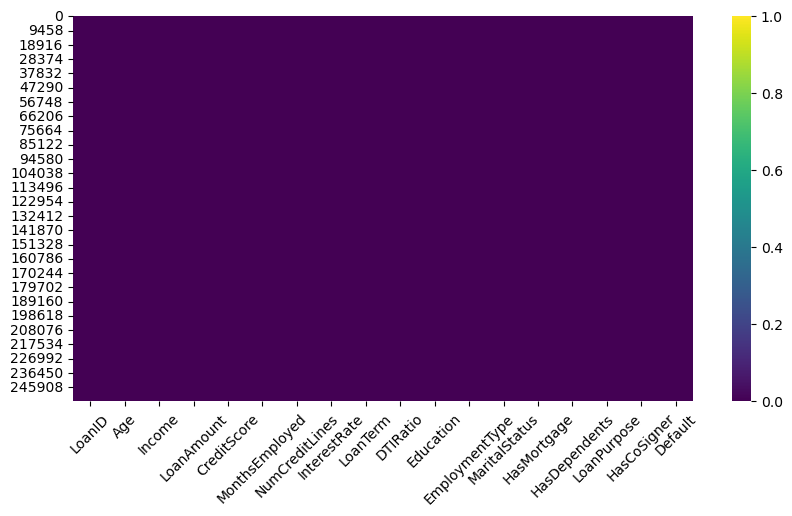

In [10]:
# Using heatmap to visualize the check for missing values
plt.figure(figsize  = (10,5))
sns.heatmap(data = data.isnull(), cmap = "viridis", vmin = 0, vmax =1)
plt.xticks(rotation = 45)
plt.show();

In [11]:
# drop irrelevant columns

data = data.drop(["LoanID"], axis =1)

In [12]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


# EXPLORATORY DATA ANALYSIS (EDA)

 1. Numerical Features
  - Univariate Analysis
  - Bi/Multivariate Analysis
-------------------------------------------
 2. Categorical Features
  - Univariate Analysis
  - Biltivariate Analysis

### 1. Numerical data

In [13]:
# Extract the Numerical Features
numerical_df = data.select_dtypes(exclude = "object")

In [14]:
numerical_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0


#### -  Univariate analysis

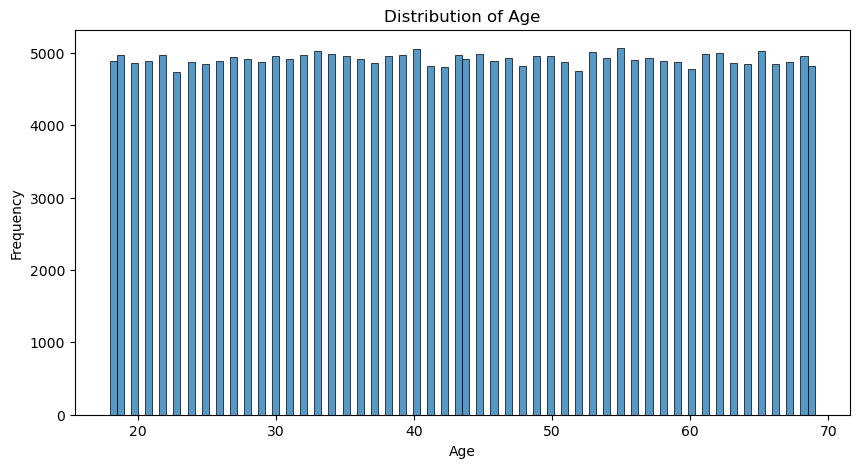

In [15]:
plt.figure(figsize = (10 ,5 ))
sns.histplot(data = data["Age"], bins = 100)
plt.title("Distribution of Age")
plt.ylabel("Frequency")
plt.show()

###### Insight: Uniform distribution of age frequency

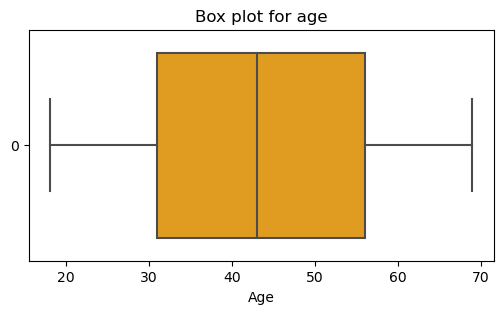

In [16]:
plt.figure(figsize = (6,3))
sns.boxplot(data = data["Age"], orient = 'h', color = "orange")
plt.title("Box plot for age")
plt.xlabel("Age");

###### Insight: Shows uniform distribution of Age Frequency

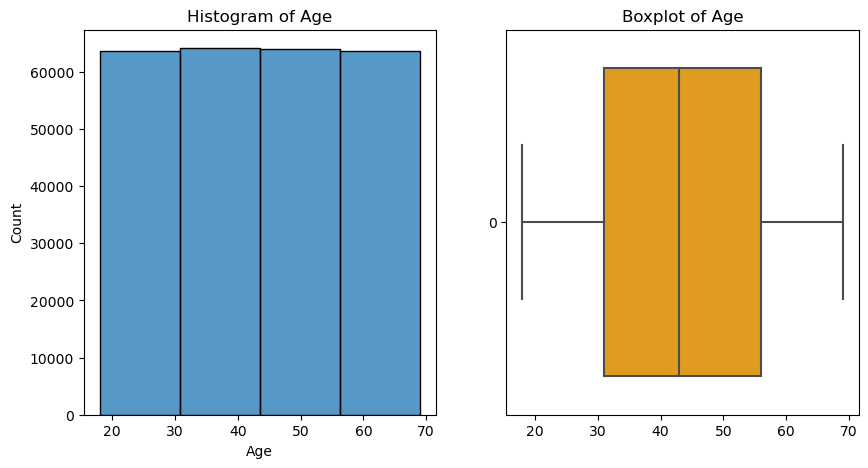

In [17]:
# Using subplots to visualize the Freauency Distribution of Age (Hist and Boxplot) at a glance
fig, position = plt.subplots(nrows= 1, ncols= 2, figsize = (10,5))

sns.histplot(data = data["Age"], bins =4, ax = position[0])
position[0].set_title("Histogram of Age")

sns.boxplot(data = data["Age"], orient = "h", color = "orange", ax = position[1])
position[1].set_title("Boxplot of Age");

###### Insight: Shows uniform distribution of Age Frequency

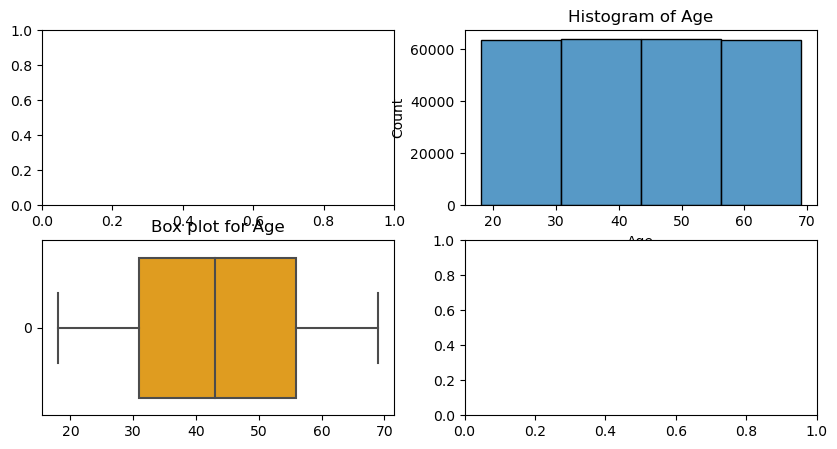

In [18]:
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize = (10,5))

sns.histplot(data= data["Age"], bins =4, ax = axes[0,1])
axes[0,1].set_title("Histogram of Age")

sns.boxplot(data = data["Age"], orient = 'h',color = "orange", ax = axes[1,0])
axes[1,0].set_title("Box plot for Age");

In [19]:
numerical_df.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0


**Distibution of All Numerical features -  Univariate Analysis**

In [20]:
# Create a list for the Numerical Features
numerical_cols = numerical_df.columns.to_list()

In [21]:
numerical_cols

for index,name in enumerate(numerical_cols):
    print(name)

Age
Income
LoanAmount
CreditScore
MonthsEmployed
NumCreditLines
InterestRate
LoanTerm
DTIRatio
Default


In [22]:
# Using subplots (Boxplot) to visualize the distribution of all Numerical Features and identify potential outliers.

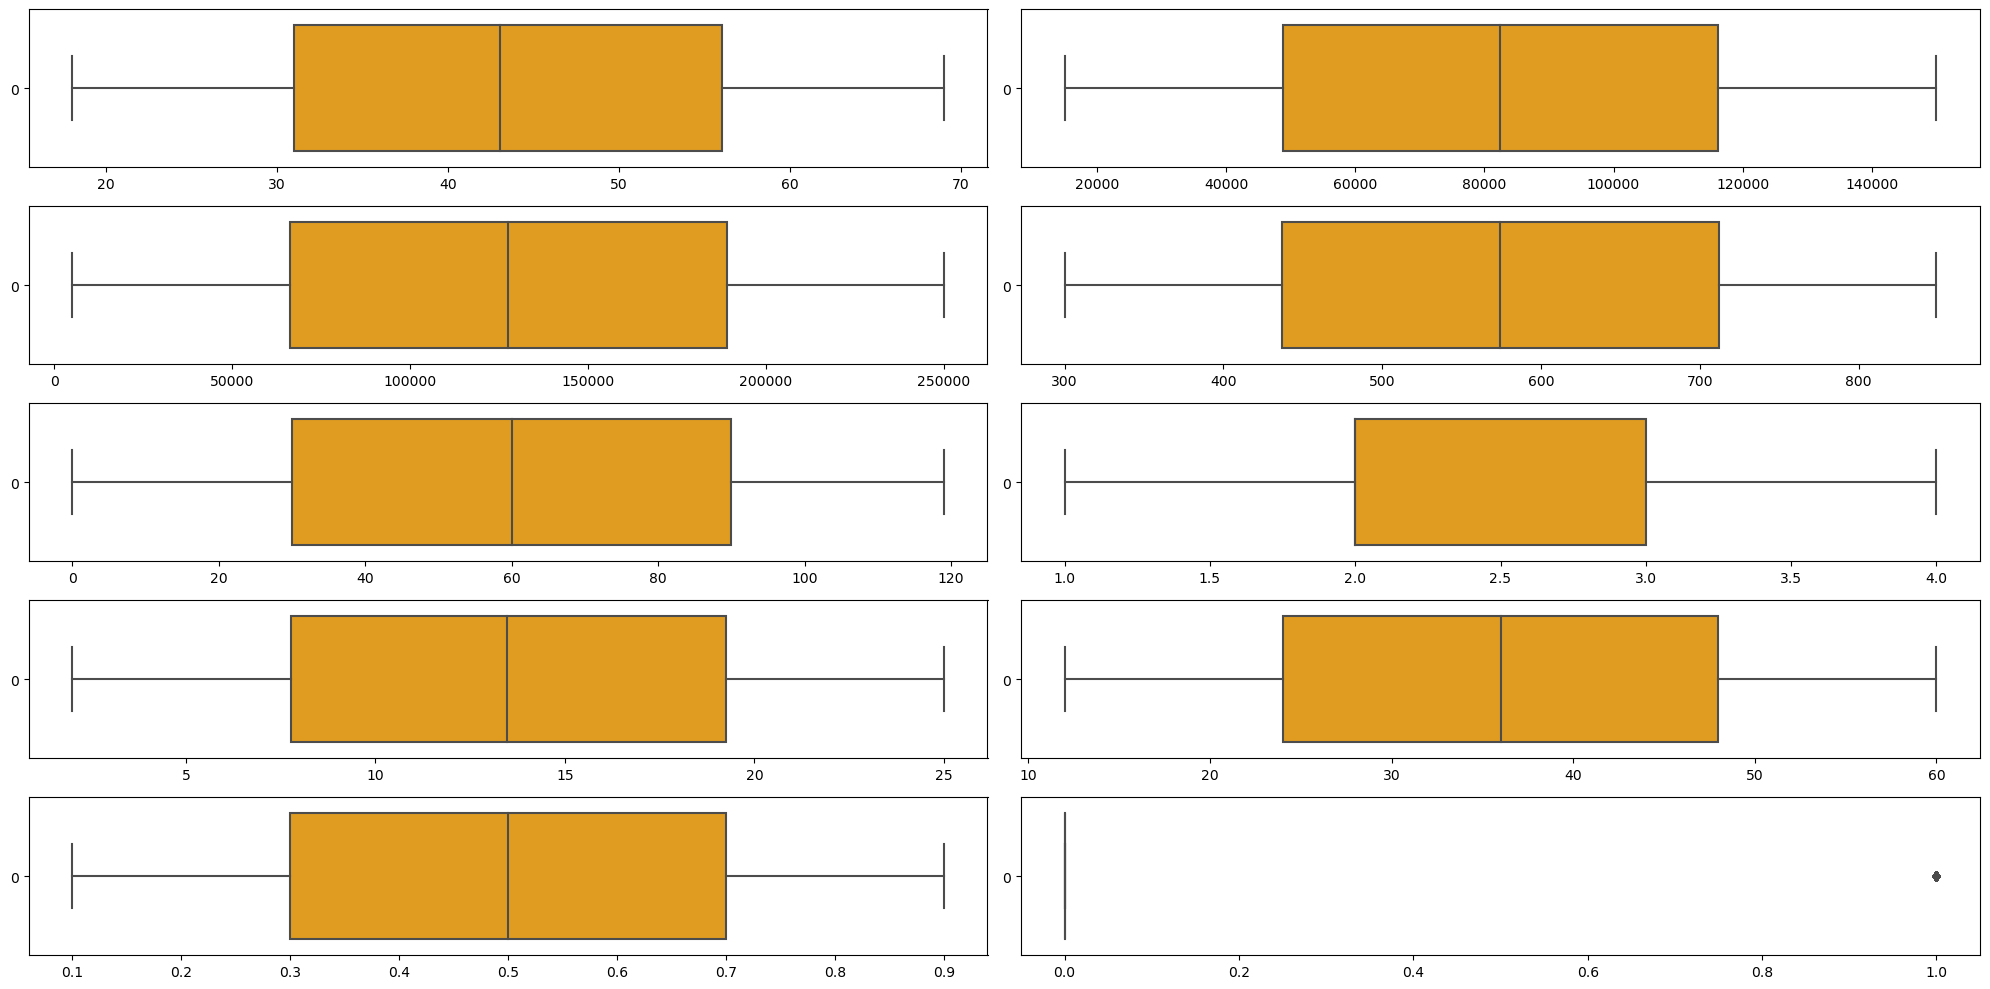

In [23]:
n_features  =len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,10))

position  = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.boxplot(data = data[name_of_feature], ax = position[index], orient = "h", color = "orange")

plt.tight_layout();

###### Insight: The boxplots show absence of outliers, suggesting that the numerical features are evenly distributed and free from extreme values, reflecting consistency and reliability in the dataset.

In [24]:
# Using subplots (Histogram) to visualize the distribution of all Numerical Features
#showing the frequency of data points falling within specified ranges , called bins

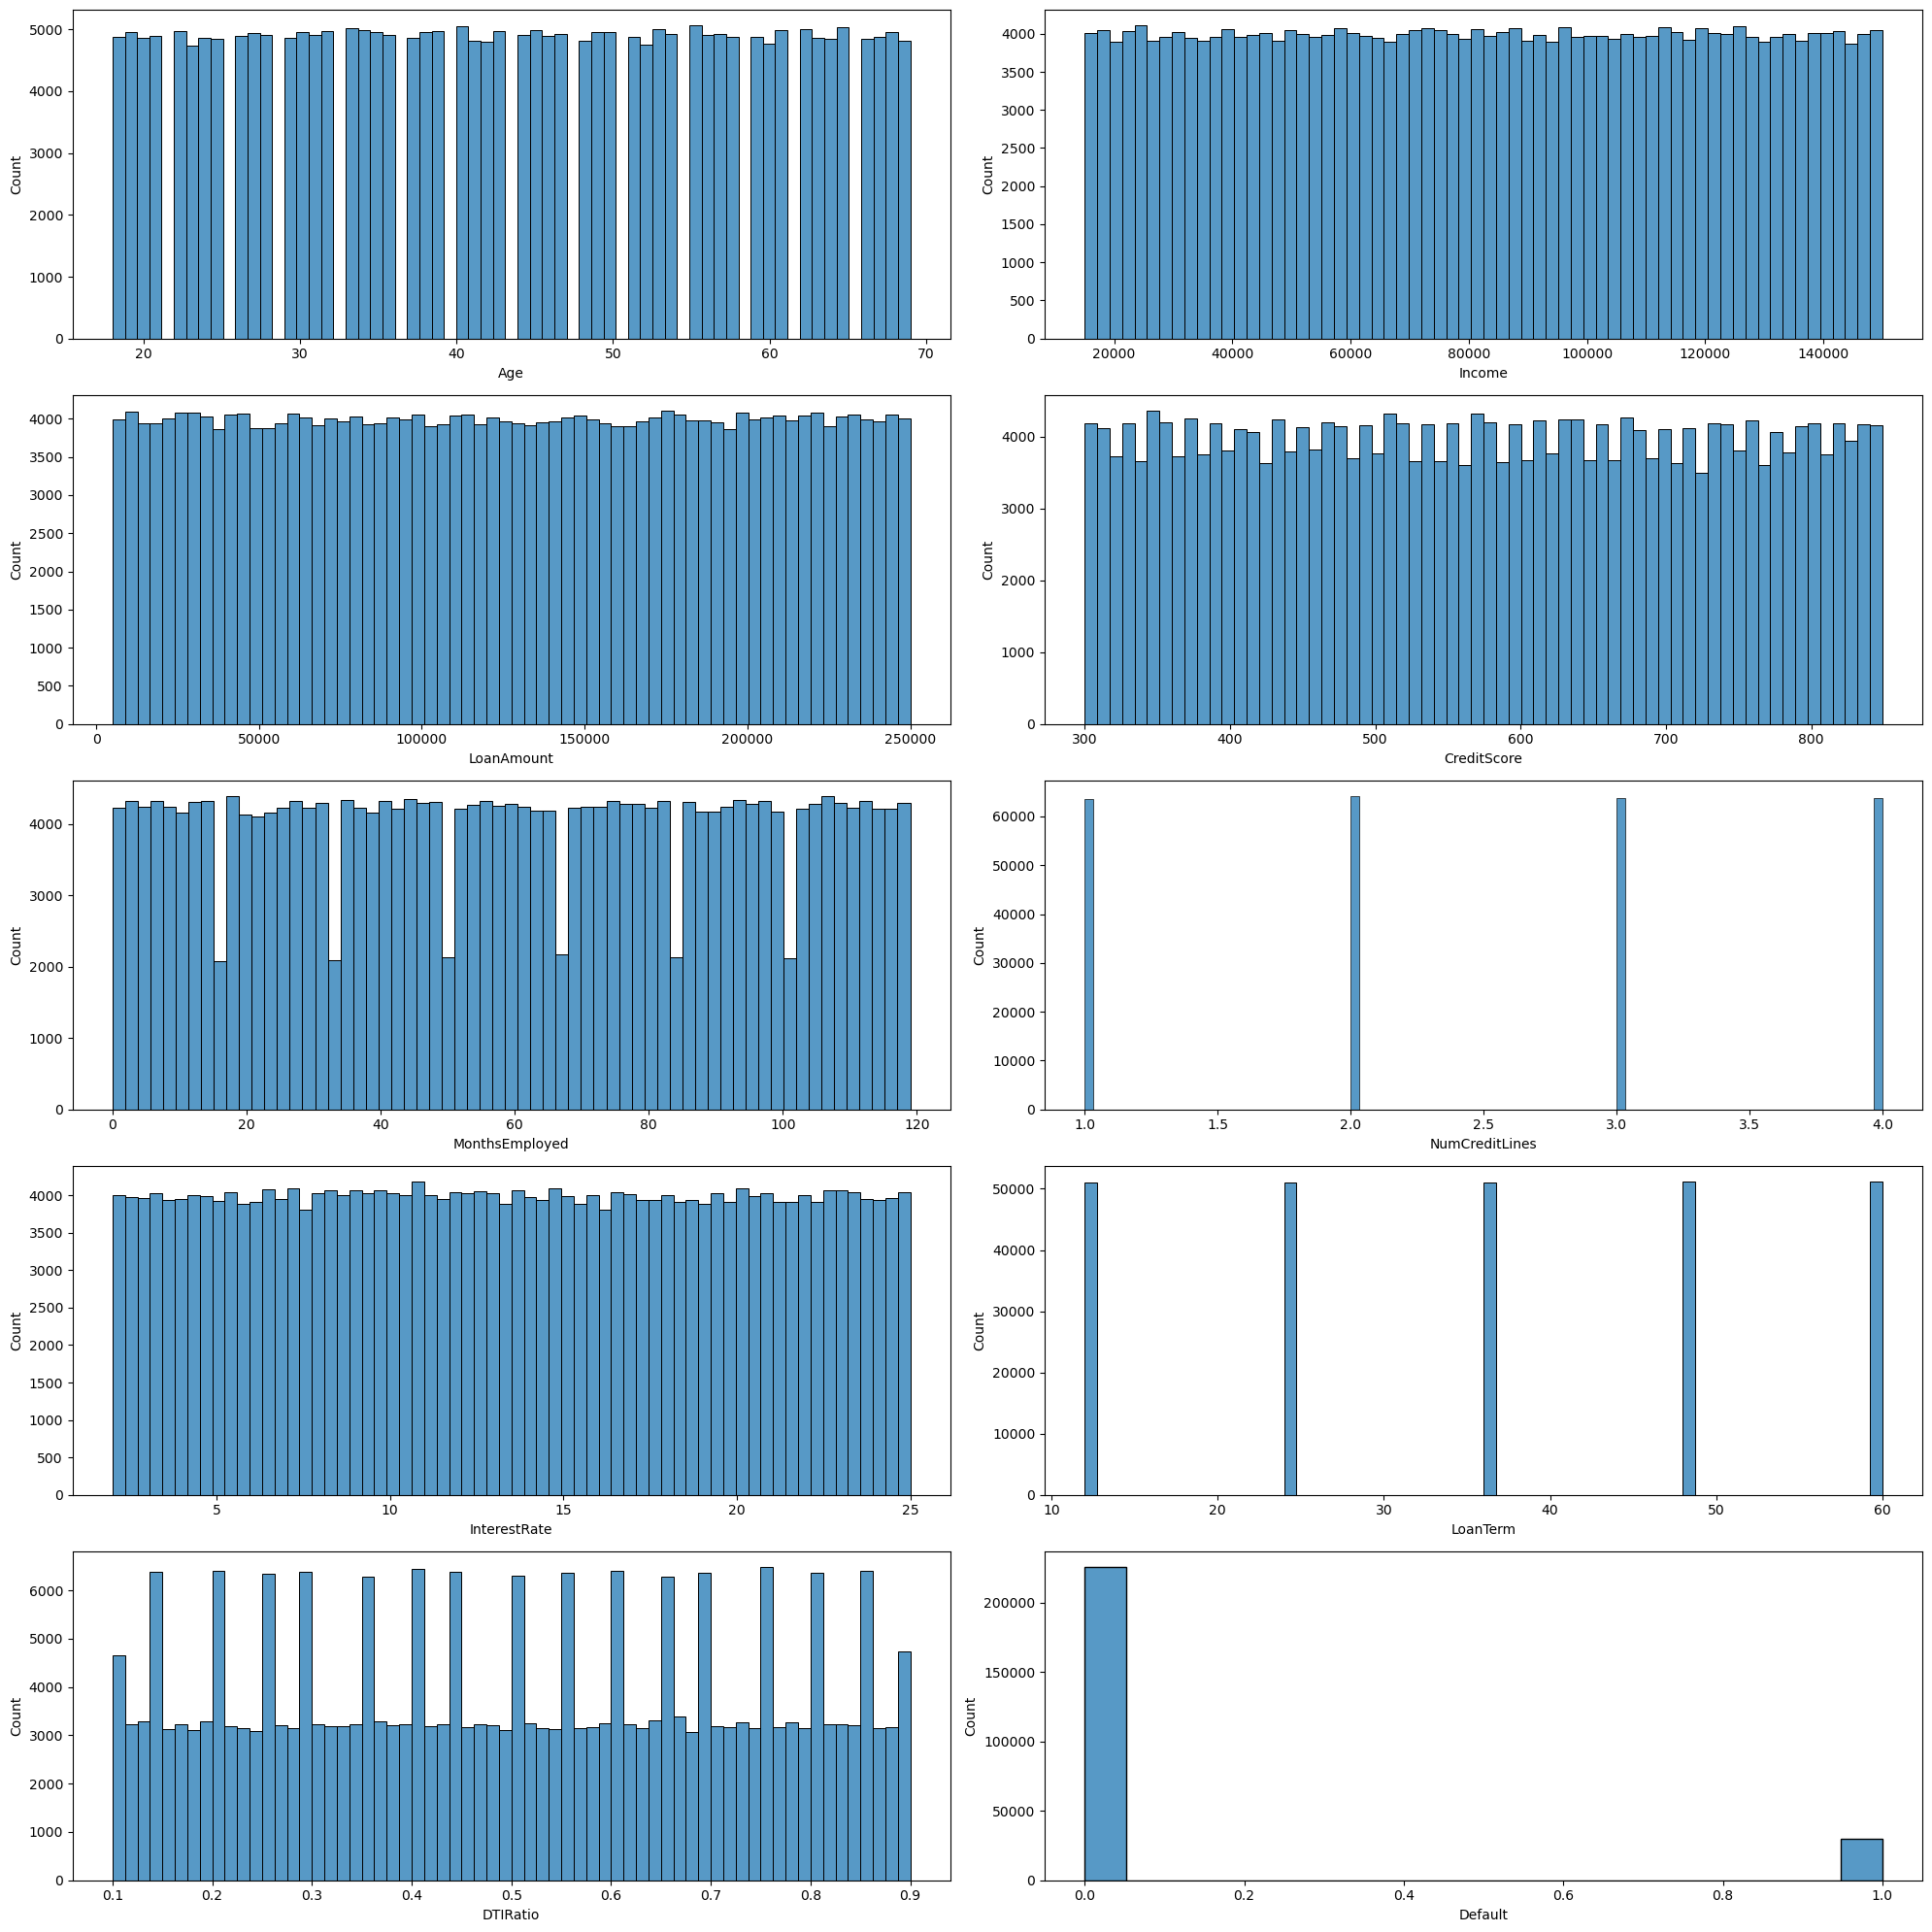

In [25]:
n_features  =len(numerical_cols)
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,20))

position  = axes.flatten()

for index, name_of_feature in enumerate(numerical_cols):
    sns.histplot(data = data[name_of_feature], ax = position[index])

plt.tight_layout()

###### Insight: The histograms display a uniform distribution, suggesting that the data is evenly distributed across the range without notable skewness or clustering.

#### - Bi vairate analysis

In [26]:
numerical_df.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


In [27]:
# Plotting Heatmap to visualize the Correlation of the Numerical Features

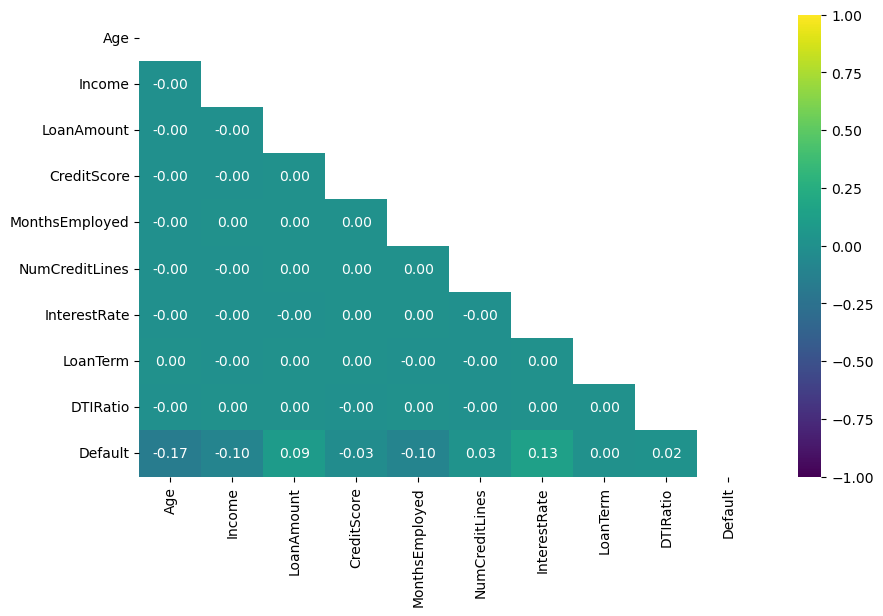

In [28]:
my_mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))

plt.figure(figsize = (10,6))
sns.heatmap(data = numerical_df.corr(), cmap = "viridis", vmin = -1, vmax = 1, fmt = ".2f", annot = True, mask = my_mask );

###### Insight:  The heatmap reveals the correlations between numerical features, highlighting which variables are strongly or weakly related, which can inform feature selection and model development.

### 2. Categorical Features

In [29]:
# Extract the Categorical Features
categorical_df = data.select_dtypes(include = "object")

In [30]:
categorical_df.head(2)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes


In [31]:
# Create a list for the Categorical Features
cat_columns = categorical_df.columns.to_list()
cat_columns

for index, name in enumerate(cat_columns):
    print(name)

Education
EmploymentType
MaritalStatus
HasMortgage
HasDependents
LoanPurpose
HasCoSigner


In [32]:
# Extract the number of unique variables in each categorical features.
for feature in cat_columns:
    print(f"{feature} -----------> {data[feature].nunique()}")

Education -----------> 4
EmploymentType -----------> 4
MaritalStatus -----------> 3
HasMortgage -----------> 2
HasDependents -----------> 2
LoanPurpose -----------> 5
HasCoSigner -----------> 2


#### -  Univariate analysis

In [33]:
education_count = data["Education"].value_counts()
education_count

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [34]:
education_count.index

Index(['Bachelor's', 'High School', 'Master's', 'PhD'], dtype='object', name='Education')

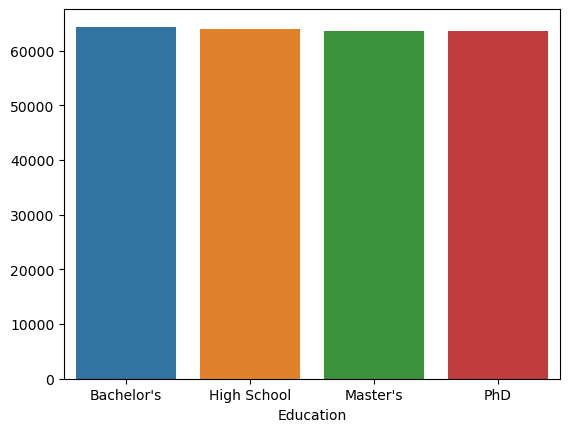

In [35]:
# Using Bar Chart to visualize the count distribution of education feature
sns.barplot(x = education_count.index , y = education_count.values);

###### Insight: The barplot shows that the counts of different education levels are very close to each other, suggesting a nearly uniform distribution of the education featue in the dataset.

Distibution of All Categorical features - Univariate Analysis

In [36]:
categorical_df.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [37]:
cat_columns

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

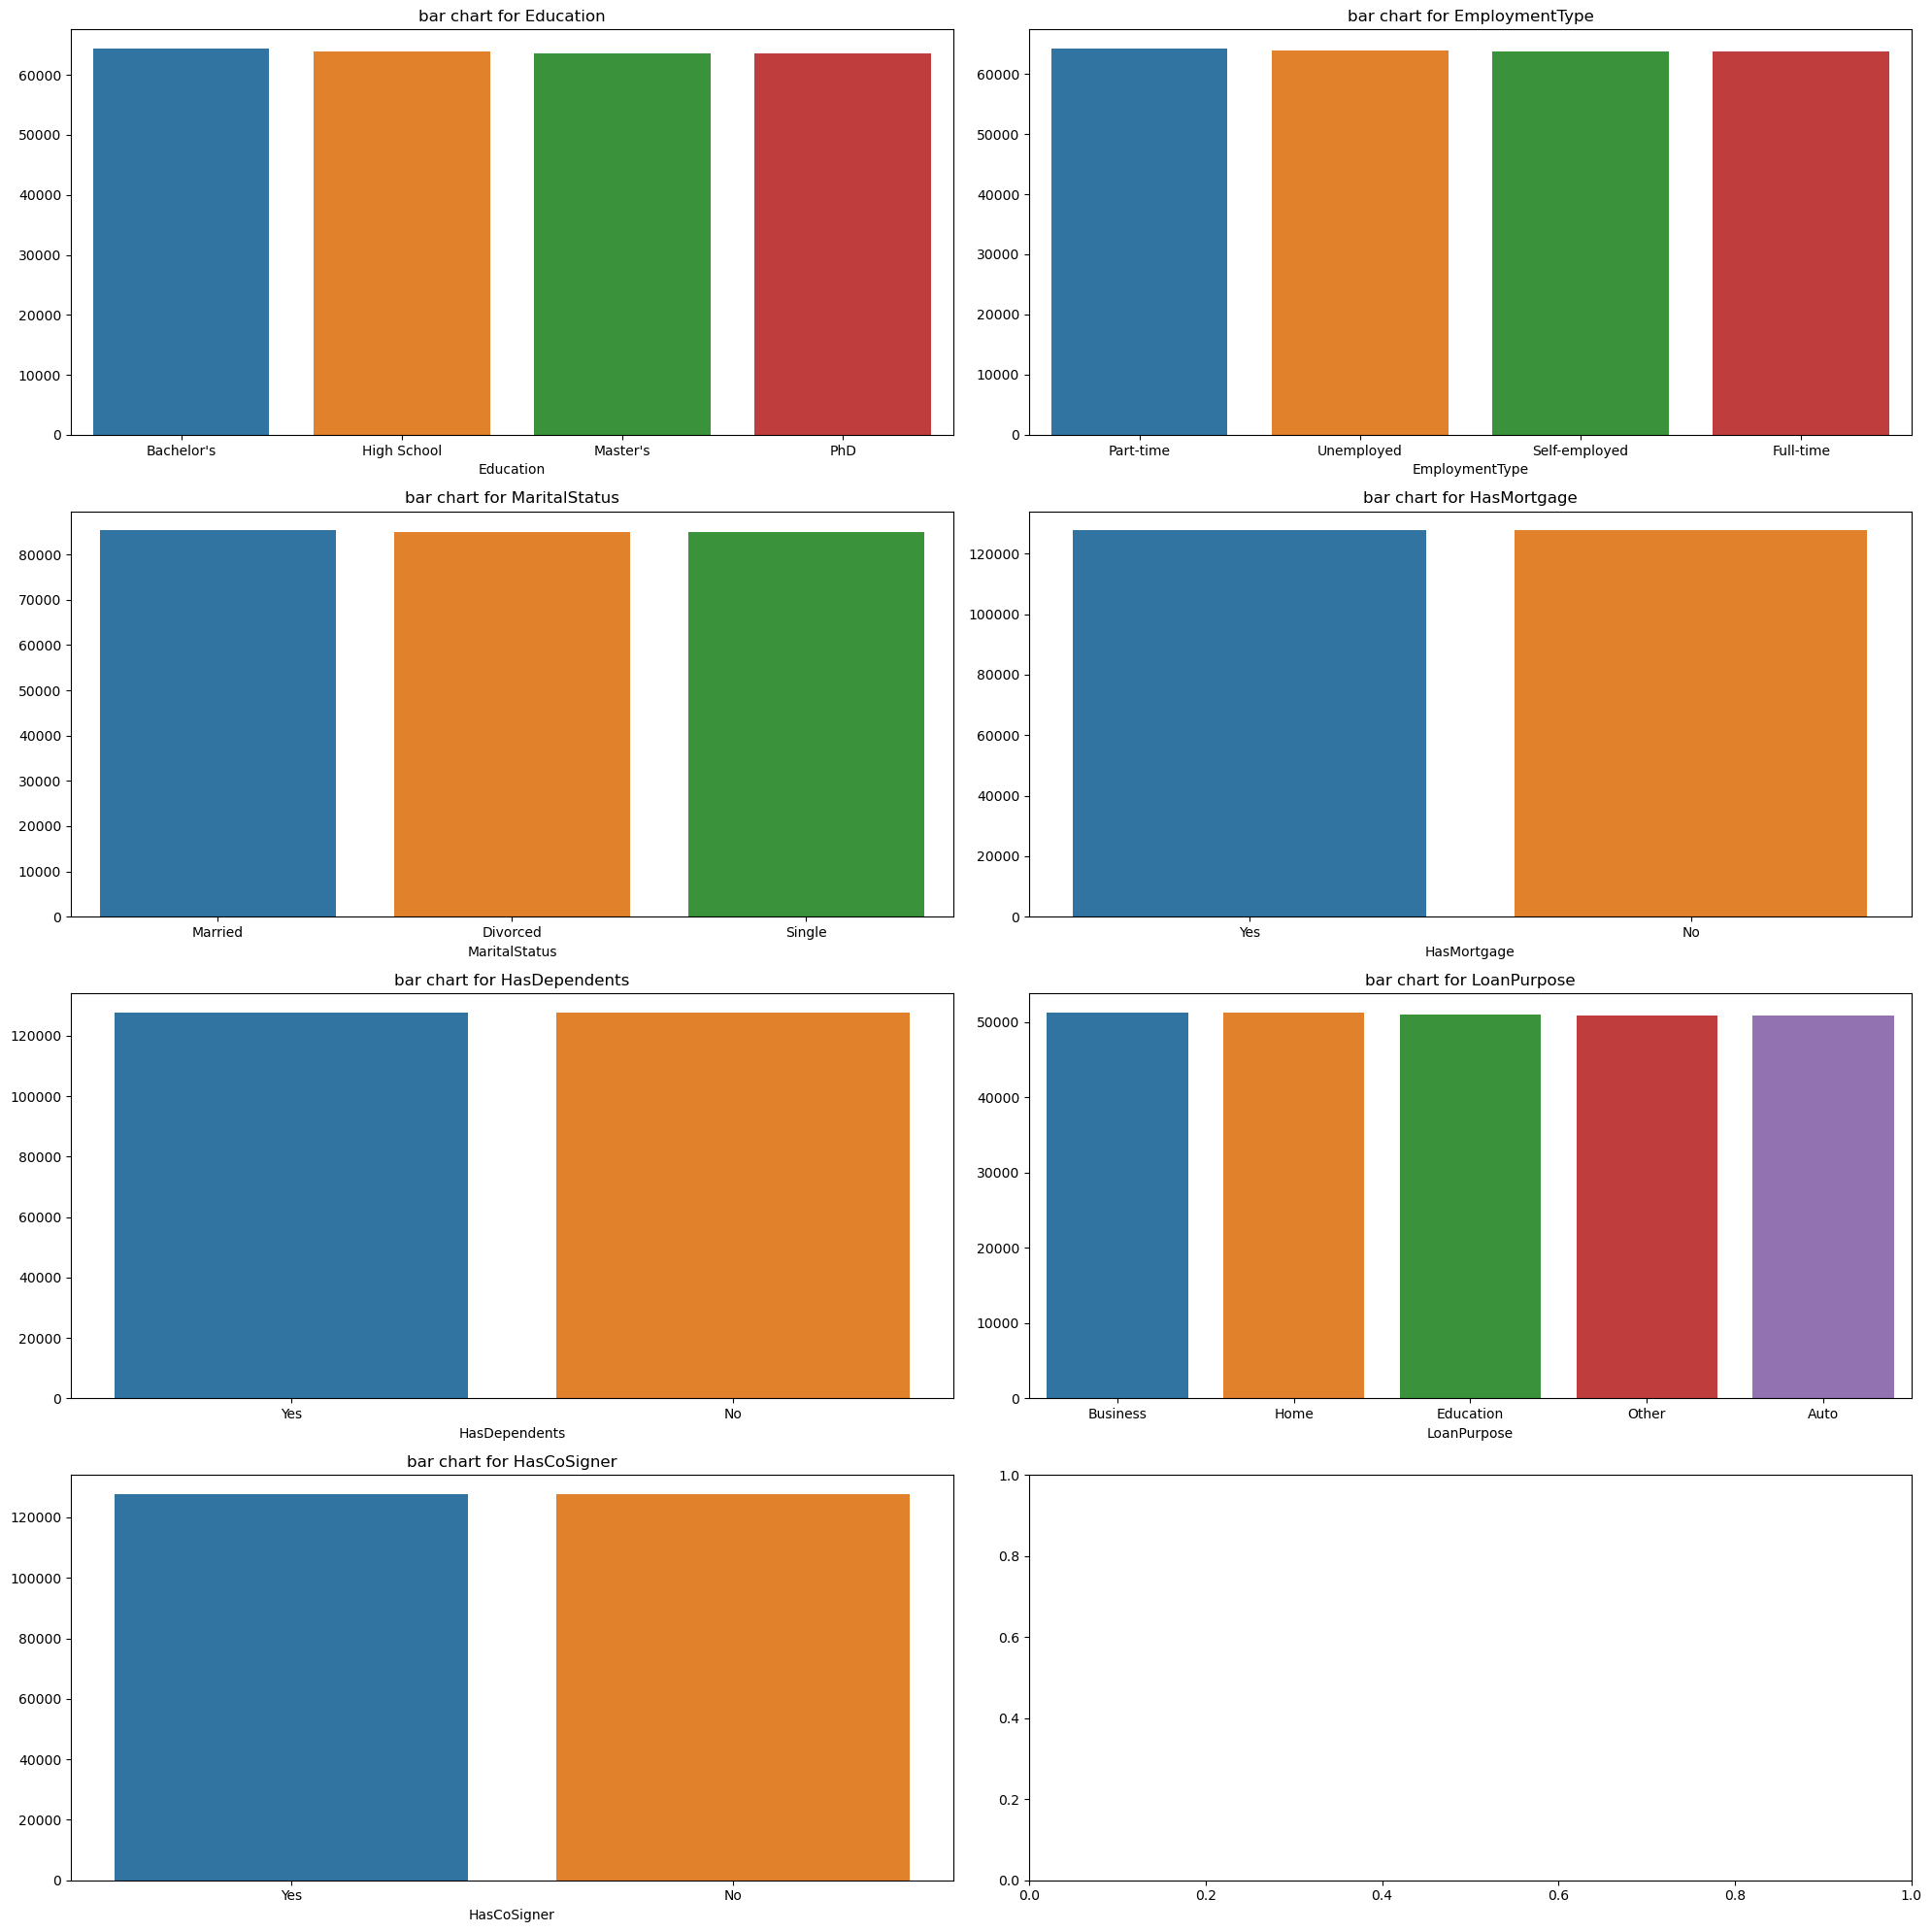

In [38]:
# Using suplots (Bar Chart plot) to visualize the counts/frequencies for all categorical features.
fig, axes = plt.subplots(nrows= 4, ncols= 2, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.barplot(x = data[feature].value_counts().index, y = data[feature].value_counts().values, ax = position[index])
    position[index].set_title(f"bar chart for {feature}")

plt.tight_layout();

###### Insight: The barplot indicates a nearly even distribution across all the categorical features, suggesting that no single category significantly dominates the dataset

#### -  Bi-variate analysis

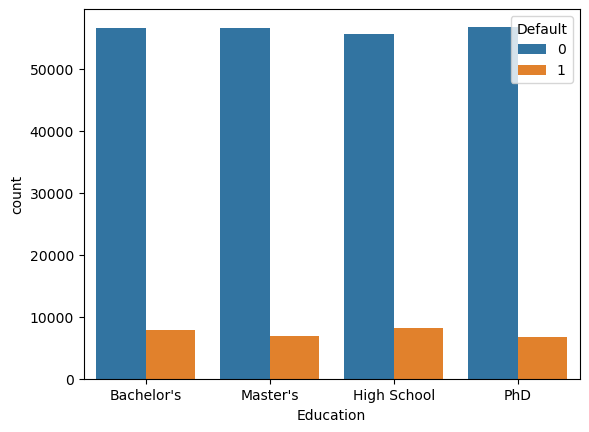

In [39]:
# Visualizing the count of Loan Defaults across the Education Feature.
sns.countplot(data = categorical_df, x = "Education", hue = data["Default"]);

###### Insight: The countplot shows that the count of defaults is relatively low accross different  education levels, while the count of non-defaults is significantly higher, indicating that educational background may have a limited impact on the default rates in the dataset.

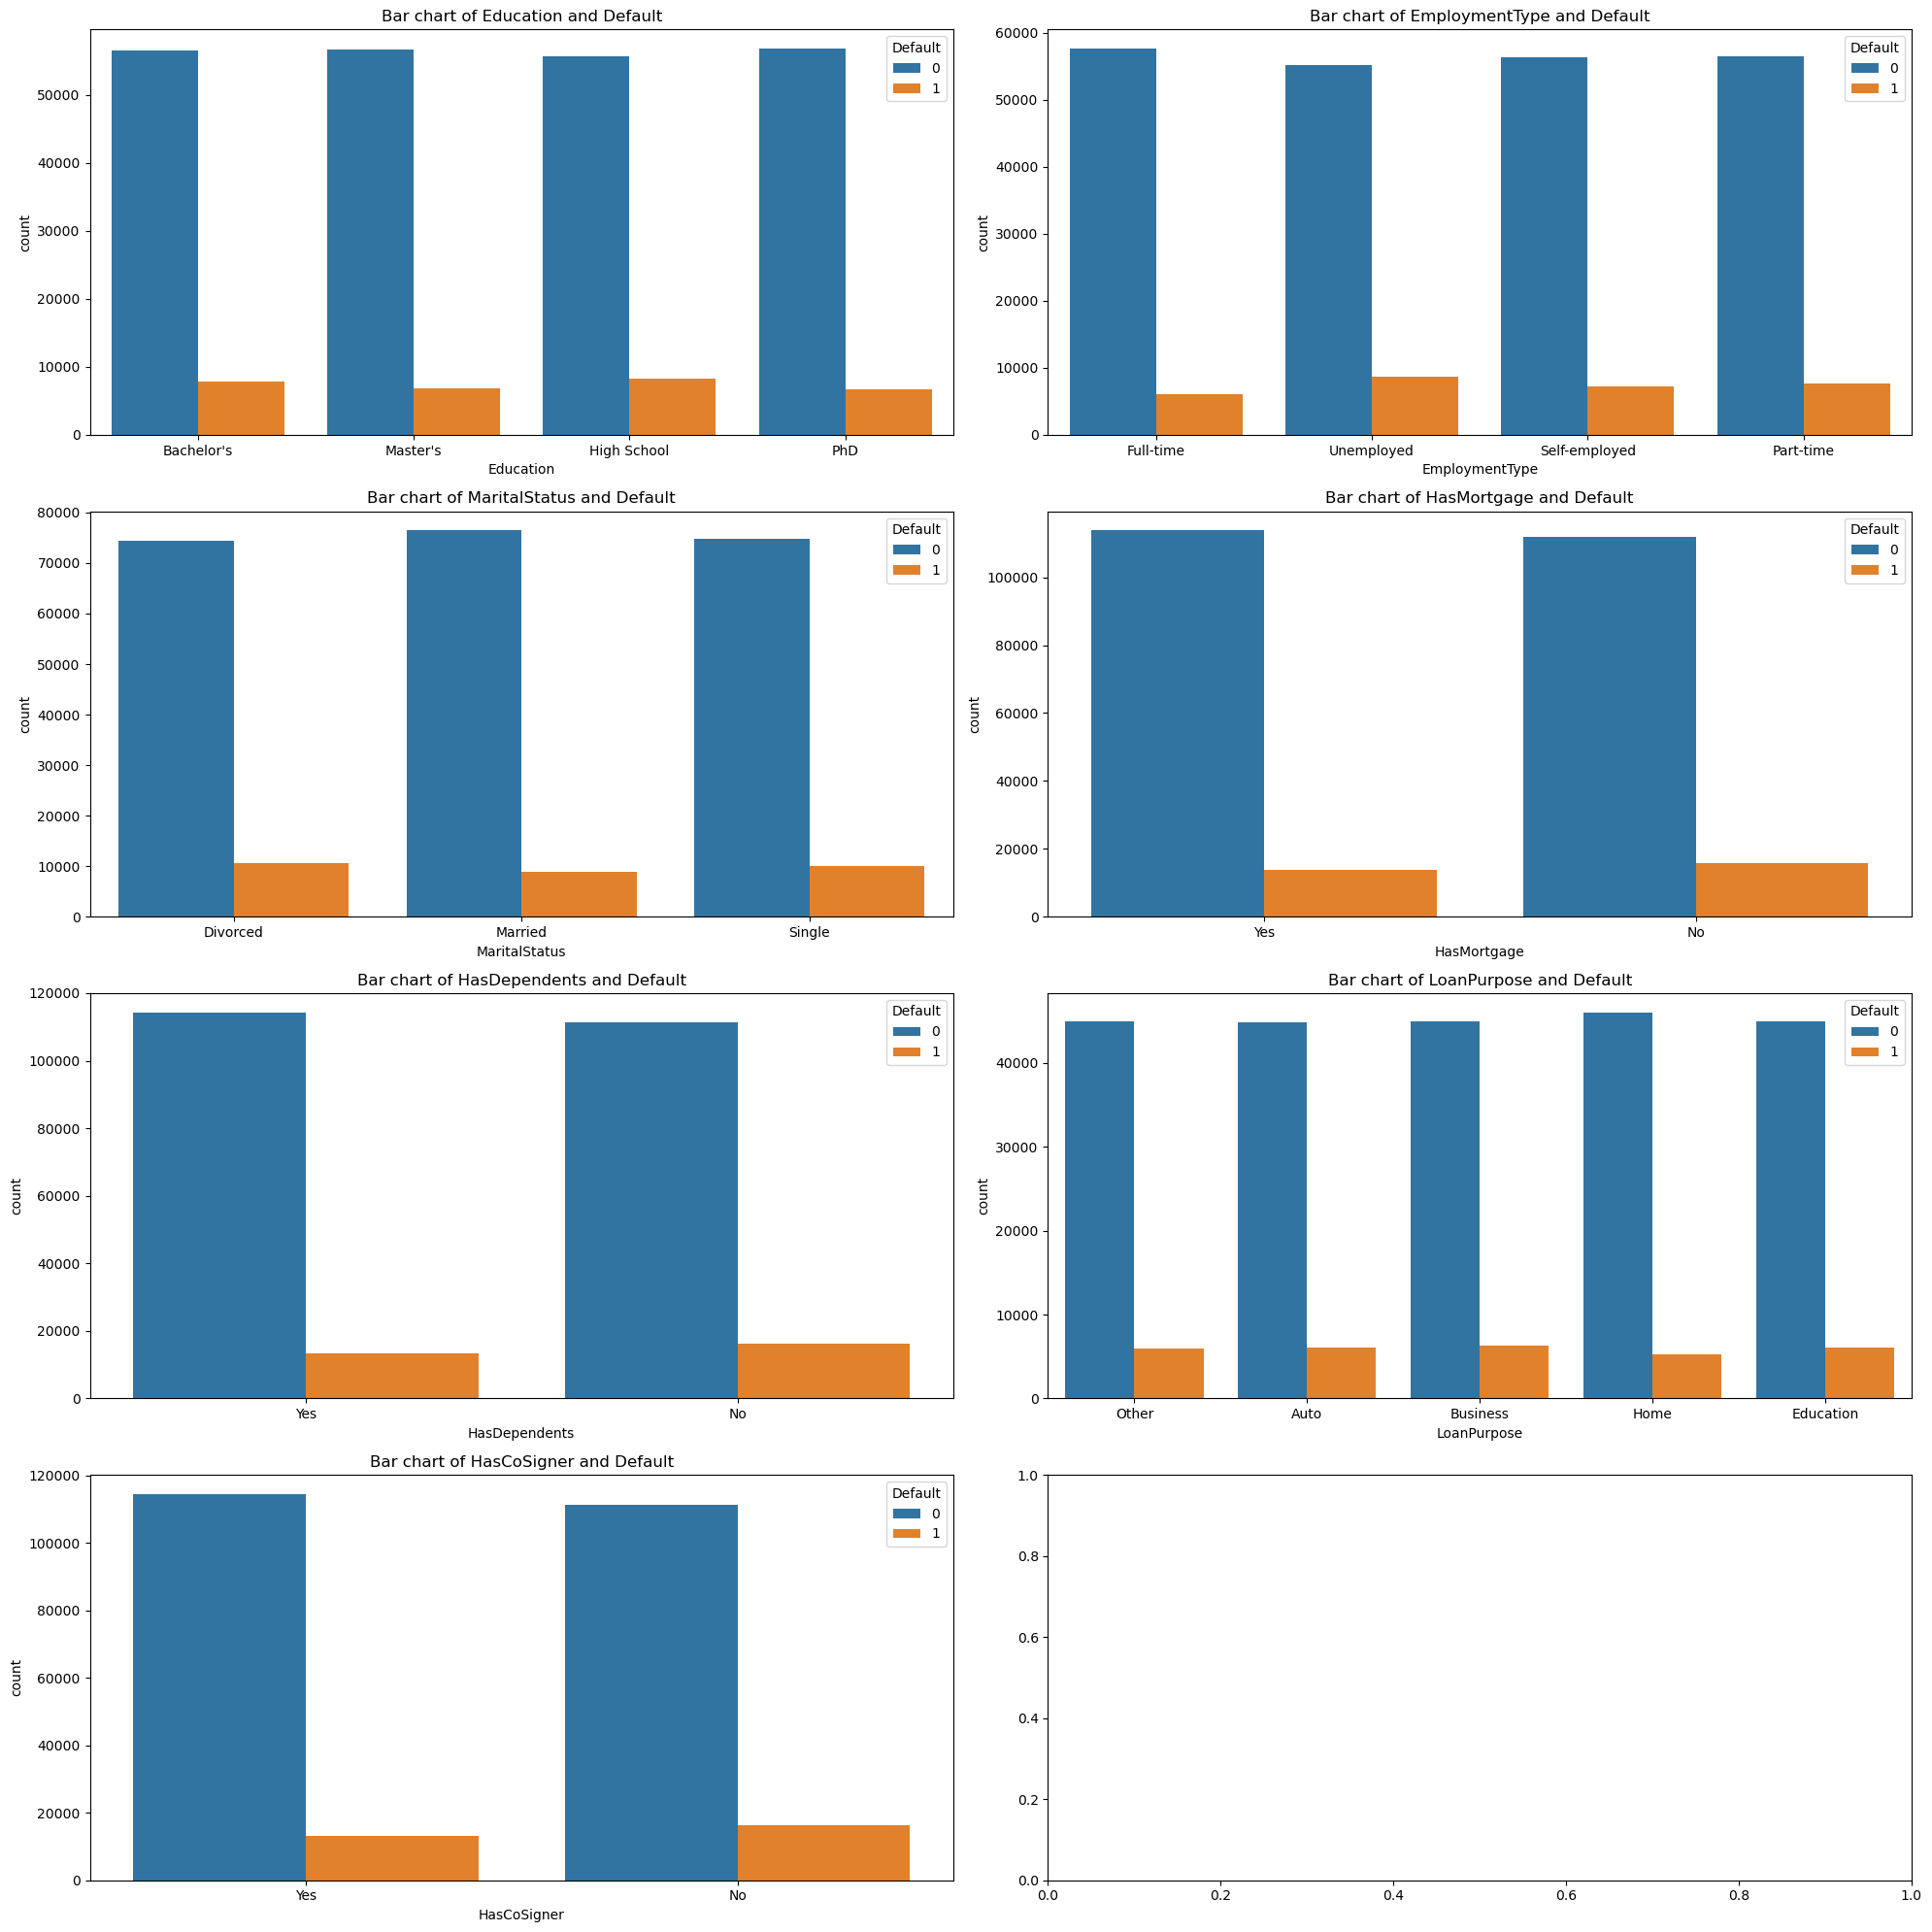

In [40]:
# Using subplots (count plots) to visualize the count of loan defualts accross all categorical features in the dataset.
fig, axes = plt.subplots(nrows= 4, ncols= 2, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(cat_columns):
    sns.countplot(data = categorical_df, x = feature, hue = data["Default"], ax = position[index])
    position[index].set_title(f"Bar chart of {feature} and Default")

plt.tight_layout();

###### Insight: The countplot shows that the count of defaults is relatively low accross all categorical features, while the count of non-defaults is significantly higher, indicating that the categorical features may have a limited impact on the default rates in the dataset.

## Target Feature 'DEFAULT' Description

In [41]:
# To extract the unique values of the default feature
data["Default"].value_counts().index

Index([0, 1], dtype='int64', name='Default')

In [42]:
# To retrieve an array of the counts of each unique value in the default feature
data["Default"].value_counts().values

array([225694,  29653], dtype=int64)

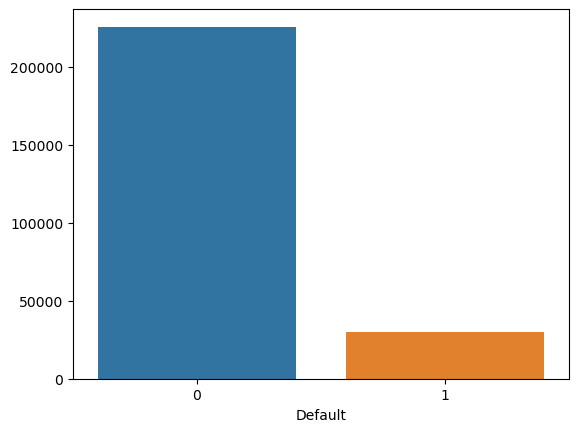

In [43]:
# Creating a barplot to show the distribution of counts for each category within the default feature
sns.barplot(x = data["Default"].value_counts().index, y = data["Default"].value_counts().values);

###### Insight: The barplot shows that the number of instances with no default `0` significantly exceeds the number of instances with a default `1`, indicating a higher prevalence of non-defaults in the dataset.

# FEATURE ENGINEERING/ DATA PRE - PROCESSING

 1. Creating a copy of the dataset
 -  Assign a variable for the Train Set
 -  Assign a variable for the Test Set
---------------------------------------------------- 
 2. Encoding Categorical Features
 -  Use LabelEncoder (.fit_transform) to learn and convert the categorical features into numerical values
 
---------------------------------------------------- 

### 1. Creating a copy of the dataset
 -  Assign a variable for the Train Set
 -  Assign a variable for the Test Set

In [44]:
# Create a copy of the data and assign the variable 'loanD' for the train set and variable 'labels' for the test set
## loanD = Train Set
## labels = Test Set

loanD = data.drop(['Default'], axis=1)
labels = data['Default']

In [45]:
loanD.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [46]:
labels.head(5)

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [47]:
# Check if number of elements(rows) in the features and labels are equal 
len(loanD) == len(labels)

True

### 2. Encoding Categorical Features
#### Using LabelEncoder  - to encode (fit and transform) categorical features into numeric values as ML algorithms works only with numeric values(numbers)

In [48]:
# Select categorical columns
all_categorical_column = loanD.select_dtypes(include=['object'])

In [49]:
all_categorical_column.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [50]:
# Initializing Label Encoder(Encoding categorical variables)
encoder = LabelEncoder()

Two steps to encode any data:
1. fit
2. transform

In [51]:
# Step 1 - Use the .fit()method to learn the unique categories present in the Education feature of the all cat colums.
encoder.fit(all_categorical_column['Education'])

LabelEncoder()

In [52]:
# Step 2 - Use the .transform()method to Convert categorical values in the Education feature into numeric labels.
encoder.transform(all_categorical_column['Education'])

array([0, 2, 2, ..., 1, 1, 0])

In [53]:
# Combining both steps together in one function to Learn and Convert.
encoder.fit_transform(all_categorical_column['Education'])

array([0, 2, 2, ..., 1, 1, 0])

#### Encoding all the categorical columns in a loop 
 - Using for loop to fit and transform all cat columns to numeric values

In [54]:
for categorical_column in all_categorical_column:
    print(categorical_column)

Education
EmploymentType
MaritalStatus
HasMortgage
HasDependents
LoanPurpose
HasCoSigner


In [55]:
# Use the LabelEncoder() - fit, transform - to learn and Convert all cat columns in the train set(features) in to numeric values
for categorical_column in all_categorical_column:
    loanD[categorical_column] = encoder.fit_transform(loanD[categorical_column])

In [56]:
print(data.head())
loanD.head()

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44   Bachelor's      Full-time      Divorced   
1          4.81        60      0.68     Master's      Full-time       Married   
2         21.17        24      0.31     Master's     Unemployed      Divorced   
3          7.07        24      0.23  High School      Full-time       Married   
4          6.51        48      0.73   Bachelor's     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0


# MODEL BUILDING - SUPERVISED MACHINE LEARNING

 1. Data splitting
 -  Data before Spliting
 -  Split Data into Train Set and Test Set
 -  Data after Spliting
---------------------------------------------------- 
 2. Model Building using only ML Algorithm classifier (Logistic Regression only)
 -  Model Training 1
 -  Model Evaluation 1 - evaluate and using confusion matrix to visualize result.
----------------------------------------------------  
 3. Improve Model Performance 
 -  Feature Scaling - Data Normalization using MinMaxScaler (since data has a uniform distribution)
 -  Model Training 2
 -  Model Evaluation 2 - evaluate and using confusion matrix to visualize result
 ----------------------------------------------------  
 4. Improve Model Performance (affected by class inbalance)
 -  Inform the model of our class imbalance and manually assign some class weight/importance to our weak class
 -  Model Training 3
 -  Model Evaluation 3 - evaluate and using confusion matrix to visualize result
  ----------------------------------------------------
 5. Deploying Various Machine Learning (ML) Algorithm Classifiers
 -  Logistic Regression
 -  SGD Classifiers
 -  Decision Tree
 -  Random Forest
 ---------------------------------------------------- 
 6. Feature Importance and Feature Selection
 -  Select the classifier for the feature importance
 -  Create a data frame for feature importance and plot to visualize the feature importance
 -  Select the top five(5) Features
 -  Scale the top 5 selected (x_train, x_test) Features
 -  Model Training 4
 -  Model Evaluation 4 - evaluate and using confusion matrix to visualize result
 ---------------------------------------------------- 
 7. Automating the Process of Model Tuning (Hyperparameter Tuning) - Selecting the Best Classifiers (parameters) to Train Model
 -  Create Hyperparameter tuning
 -  Initializing Grid Search
 -  Model Training - To get best estimator
 -  Model Evaluation - evaluate and using confusion matrix to visualize result
 ---------------------------------------------------- 

### 1. Data Spliting

#### a). Data before Spliting

In [69]:
# Get the number of elements (rows) in the train set(features) before spliting the data
print(f'Our train data contains {len(loanD)} records before spliting')

Our train data contains 255347 records before spliting


In [70]:
# Get the number of elements (rows) in the test set(labels) before spliting the data
print(f'Our test data contains {len(labels)} records before spliting')

Our test data contains 255347 records before spliting


#### b). Split the data into training and testing sets

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(loanD, labels, test_size=0.2, random_state=42)

train_set = [[X_train, y_train]]
test_set = [[X_test, y_test]]

#print('Train Set')
#print(train_set)
#print('------------------------------------------------------')
#print('Test Set')
#print(test_set)

#### c). Data after spliting

In [72]:
# Get the number of elements (rows) in the train set(features) after spliting the data
print(f"Our train data contains {len(X_train)} records after spliting")

Our train data contains 204277 records after spliting


In [73]:
# Get the number of elements (rows) in the test set(labels) after spliting the data
print(f"Our test data contains {len(X_test)} records after spliting")

Our test data contains 51070 records after spliting


In [74]:
# Check if sum of elements (rows) in train set and test set equals the numebr of total elements in the dataset
len(X_train) + len(X_test) == len(data)

True

In [75]:
# Extract Train Set
X_train.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1


In [76]:
# Extract Test Set
X_test.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
51139,55,112656,92393,581,113,2,23.54,36,0.15,3,2,2,1,1,3,0
71005,56,91569,131575,641,54,1,15.19,12,0.43,1,1,0,1,1,2,1
35684,26,78169,75417,569,105,3,18.02,12,0.29,2,1,1,1,1,2,1


### 2. Model Building using only ML Algorithm classifier (Logistic Regression only)

#### a).  Model Training 1
###### We'll start with a logistic regression

In [142]:
# Initialize the model
model = LogisticRegression(random_state=42)

In [143]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [144]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [145]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
# Check if train result equals the test result (Mode Performance)
y_test.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
len(predictions) == len(y_test)

True

#### b). Model Evaluation 1

In [148]:
# Evaluate the model
report = classification_report(y_test, predictions, digits = 5)
matrix = confusion_matrix(y_test, predictions)


In [149]:
# Display results (NB - Fi-score = harmonic mean of precision/recall)
print('Classification Report:\n', report)
print('Confusion Matrix:\n', matrix)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('\nLogistic Regression:')
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))
print('F1-score:', f1_score(y_test, predictions))
print('AUC-ROC:', roc_auc_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0    0.88456   0.99998   0.93873     45170
           1    0.83333   0.00085   0.00169      5900

    accuracy                        0.88455     51070
   macro avg    0.85894   0.50041   0.47021     51070
weighted avg    0.87864   0.88455   0.83048     51070

Confusion Matrix:
 [[45169     1]
 [ 5895     5]]

Logistic Regression:
Accuracy: 0.88455061680047
Precision: 0.8333333333333334
Recall: 0.000847457627118644
F1-score: 0.001693193362682018
AUC-ROC: 0.5004126595197803


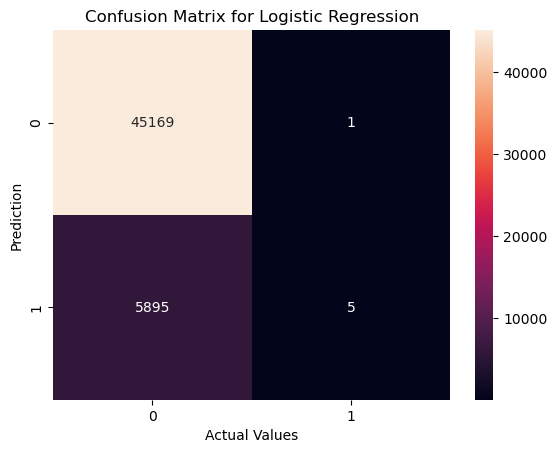

In [150]:
sns.heatmap(matrix, annot = True, fmt = 'g')

plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Confusion Matrix for Logistic Regression')

plt.show();

Insight: The logistic regression confusion matrix shows that the model excels at predicting the negative class with `45,169` correct predictions `(TN)` but struggles with positive cases, having `5,895` false positives `(FP)` and only `5` true positives `(TP)`. It made just `1` false negative `(FN)`. This indicates strong performance for negative predictions but highlights a need for improvement in detecting positive cases.

### 3. Now let's experiment, and see how to improve the model performance

## Feature Scaling
#### First lets show the importance of data scaling
Because our data is has a uniform distribution, we'll use Min-Max Scaler.<br>
If the distribution is normal, we'll use a Standard Scaler

In [151]:
# Initialize the Scaler and Scale our training data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
# Initialize the model
model = LogisticRegression(random_state=42)

#### c).  Model Training 2

In [153]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [154]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

#### d).  Model Evaluation 2

In [155]:
# Evaluate the model
report = classification_report(y_test, predictions, digits = 5)
matrix = confusion_matrix(y_test, predictions)

In [156]:
# Display results
print('Classification Report:\n', report)
print('Confusion Matrix:\n', matrix)

print('\nLogistic Regression:')
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))
print('F1-score:', f1_score(y_test, predictions))
print('AUC-ROC:', roc_auc_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0    0.88741   0.99752   0.93925     45170
           1    0.62034   0.03102   0.05908      5900

    accuracy                        0.88586     51070
   macro avg    0.75387   0.51427   0.49916     51070
weighted avg    0.85655   0.88586   0.83756     51070

Confusion Matrix:
 [[45058   112]
 [ 5717   183]]

Logistic Regression:
Accuracy: 0.8858625416095555
Precision: 0.6203389830508474
Recall: 0.031016949152542373
F1-score: 0.05907990314769976
AUC-ROC: 0.5142687136730167


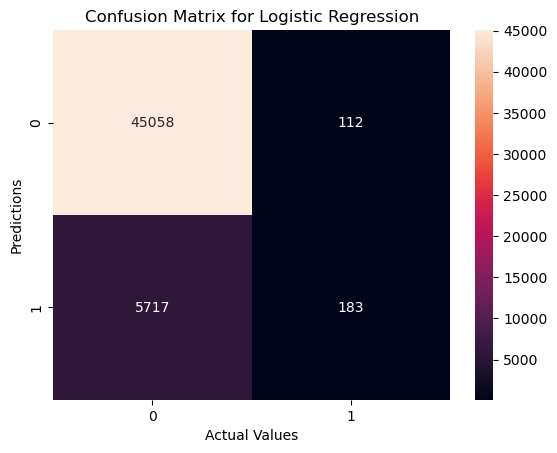

In [160]:
sns.heatmap(matrix, annot = True, fmt='g')

plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Confusion Matrix for Logistic Regression')

plt.show();

Insight: `Feature scaling` improved the model, with `45,058` True Negatives `(TN)` and `183` True Positives `(TP)`. However, `class imbalance` still leads to `5,717` False Negatives `(FN)` and `112` False Positives `(FP)`. Further enhancements, such as resampling or adjusting class weights, could better address the imbalance and improve detection of the minority class.

We can see the improvements in the class `1` predictions and slightly in the overall accuracy, precision, recall

### 4. Improve Model Performance (affected by class inbalance)

Clearly the class imbalance is affecting the model's performance

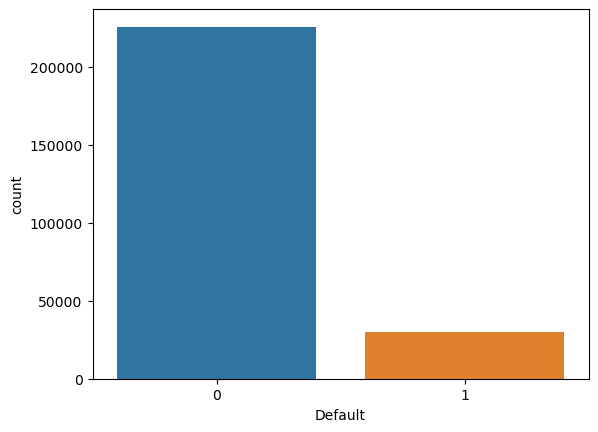

In [96]:
# Visualing to see the how class inbalance affects the model
sns.countplot(x="Default", data=data);

### Can we do better ?
Why don't we inform the model of our class imbalance and manually assign some class weight/importance to our weak class (class: `1`) ?

#### e). Model Training, and 
#### f). Model Evaluation

Classification Report:
               precision    recall  f1-score   support

           0    0.92052   0.87379   0.89654     45170
           1    0.30416   0.42237   0.35365      5900

    accuracy                        0.82164     51070
   macro avg    0.61234   0.64808   0.62510     51070
weighted avg    0.84931   0.82164   0.83382     51070

Confusion Matrix:
 [[39469  5701]
 [ 3408  2492]]

Logistic Regression:
Accuracy: 0.821636968866262
Precision: 0.30416208958867325
Recall: 0.4223728813559322
F1-score: 0.3536507485985951
AUC-ROC: 0.6480803968435627


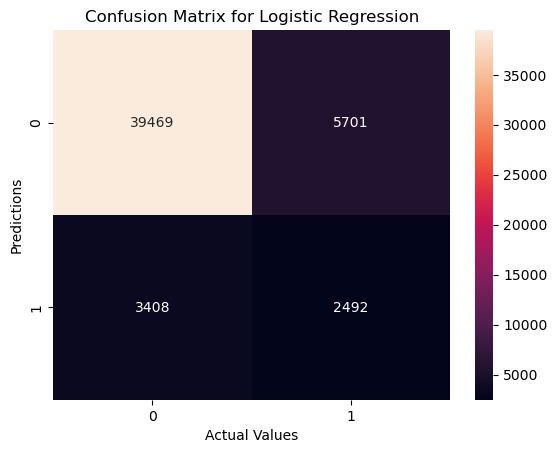

In [163]:
# Initialize the model
weights = {0:1, 1:4} # Assuming misclassifying class 1 is 4 times more costly
model = LogisticRegression(random_state = 42, class_weight = weights) 

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
report = classification_report(y_test, predictions, digits = 5)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("Classification Report:\n", report)
print('Confusion Matrix:\n', matrix)

print('\nLogistic Regression:')
print('Accuracy:', accuracy_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))
print('Recall:', recall_score(y_test, predictions))
print('F1-score:', f1_score(y_test, predictions))
print('AUC-ROC:', roc_auc_score(y_test, predictions))

# Visualize the Confusion Matrix
sns.heatmap(matrix, annot = True, fmt = 'g')

plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Confusion Matrix for Logistic Regression')

plt.show();

Insight: After applying class weights to address class imbalance, the confusion matrix shows improvements: `39,469` True Negatives `(TN)`, `2,492` True Positives `(TP)`, `3,408` False Negatives `(FN)`, and `5,701` False Positives `(FP)`. The model now detects more positive cases effectively, though it also shows an increase in False Positives. To further enhance performance, we are deploying additional machine learning classifiers to compare their effectiveness and determine the best model for this problem.

### 5. Deploying Various Machine Learning (ML) Algorithm Classifiers

##### Is this the best we can achieve ? Why not try other classification models?

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0    0.92052   0.87379   0.89654     45170
           1    0.30416   0.42237   0.35365      5900

    accuracy                        0.82164     51070
   macro avg    0.61234   0.64808   0.62510     51070
weighted avg    0.84931   0.82164   0.83382     51070



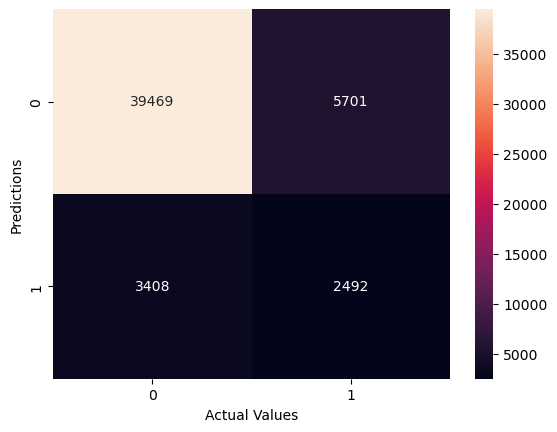

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0    0.92563   0.84062   0.88108     45170
           1    0.28354   0.48288   0.35729      5900

    accuracy                        0.79930     51070
   macro avg    0.60458   0.66175   0.61918     51070
weighted avg    0.85145   0.79930   0.82057     51070



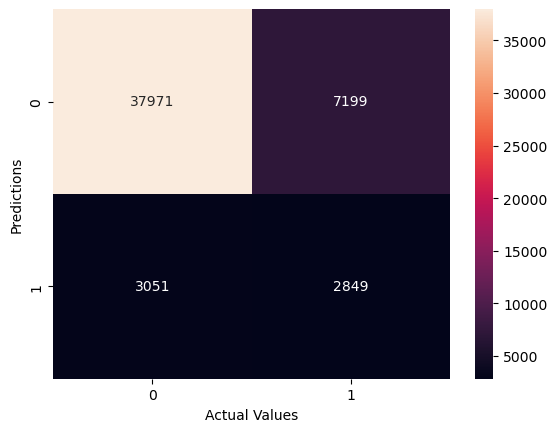

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0    0.89520   0.89219   0.89369     45170
           1    0.19531   0.20034   0.19779      5900

    accuracy                        0.81226     51070
   macro avg    0.54525   0.54626   0.54574     51070
weighted avg    0.81434   0.81226   0.81329     51070



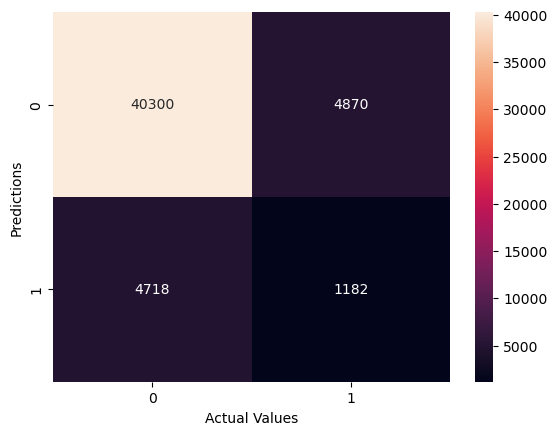

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0    0.88749   0.99763   0.93934     45170
           1    0.63605   0.03169   0.06038      5900

    accuracy                        0.88604     51070
   macro avg    0.76177   0.51466   0.49986     51070
weighted avg    0.85844   0.88604   0.83780     51070



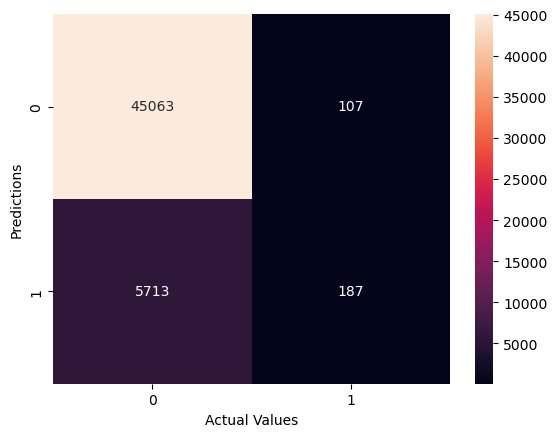

In [211]:
class_weights = {0: 1, 1: 4}

# Initialize the classifiers in a list and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model = classifier[0]
    model_name = classifier[1]
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions, digits = 5)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    
    plt.show()

Insight: Among the deployed classifiers, the `Random Forest model` demonstrated `the best performance` with the confusion matrix showing `45,063` True Negatives `(TN)`, `187` True Positives `(TP)`, `5,713` False Negatives `(FN)`, and `107` False Positives `(FP)`. It `achieved` the `highest True Positives` `and` the `lowest False Positives` compared to the other models. This indicates that the `Random Forest model` is the `most effective in predicting positive cases` while `minimizing incorrect predictions`.

### 6. Feature Importance and Feature Selection

### Do we actually need all these features?
#### Why don't we slim down the model size by selecting the most IMPORTANT features and train with them ?

In [212]:
loanD.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1


In [213]:
classifiers[3][0]

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [214]:
# Feature importance using Random Forest Classifier
importances = classifiers[3][0].feature_importances_
importances

array([0.12346932, 0.13011049, 0.11530581, 0.09621592, 0.10052636,
       0.0294051 , 0.13167643, 0.03562807, 0.08444316, 0.02935622,
       0.0285231 , 0.02304097, 0.01337598, 0.01225826, 0.035622  ,
       0.0110428 ])

In [215]:
len(importances) == len(X_train.columns)

True

In [216]:
# Create a data frame for feature importance
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,Age,0.123469
1,Income,0.130110
2,LoanAmount,0.115306
3,CreditScore,0.096216
4,MonthsEmployed,0.100526
5,NumCreditLines,0.029405
6,InterestRate,0.131676
7,LoanTerm,0.035628
8,DTIRatio,0.084443
9,Education,0.029356


In [217]:
# Arrange in Descending order (Highest to lowest)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,InterestRate,0.131676
1,Income,0.130110
0,Age,0.123469
2,LoanAmount,0.115306
4,MonthsEmployed,0.100526
3,CreditScore,0.096216
8,DTIRatio,0.084443
7,LoanTerm,0.035628
14,LoanPurpose,0.035622
5,NumCreditLines,0.029405


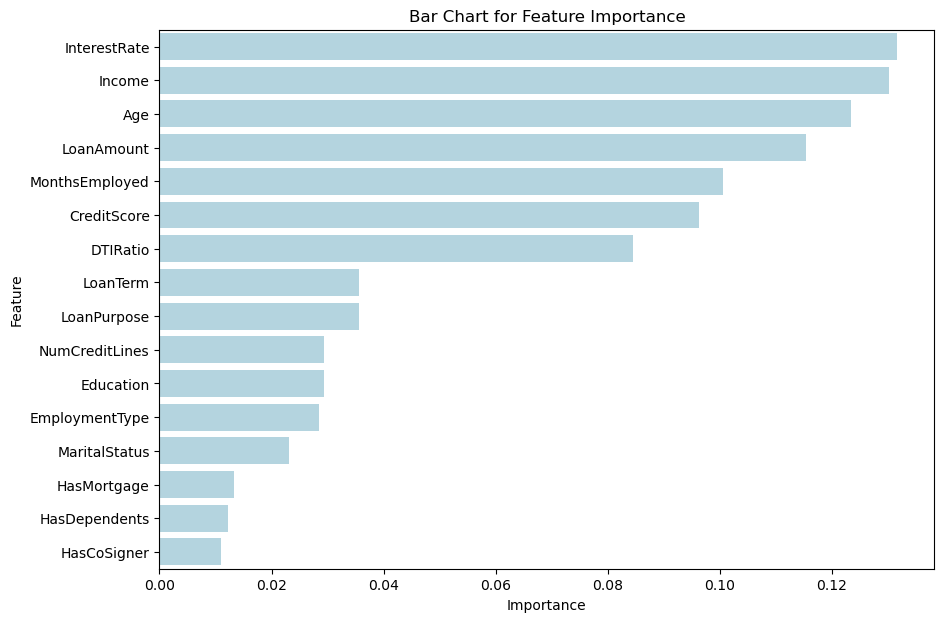

In [218]:
# Use Bar plot to visualize the feature importance
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='lightblue')
plt.title('Bar Chart for Feature Importance');


Insight: The Barchart for Feature importance after using the random forest classifier, shows the order of importance of the train set with `Interest Rate`, `Income`, `age`, `Loan Amount` and `Months Employed` being the `top 5 features` with the highest importance in determining defaulters/non defaulters.

### Let's select the top 5 features
<b>TODO:</b> Experiment with other number of features e.g. 3, 4, 6, 7, etc.

In [219]:
selected_features = feature_importance_df[:5]
selected_features

,Feature,Importance
6,InterestRate,0.131676
1,Income,0.130110
0,Age,0.123469
2,LoanAmount,0.115306
4,MonthsEmployed,0.100526


In [220]:
X_train[selected_features['Feature'].values]

,InterestRate,Income,Age,LoanAmount,MonthsEmployed
137187,10.47,137576,18,209136,26
230334,19.72,57194,47,5970,30
19687,24.25,84328,26,95065,7
106509,14.44,49795,53,229582,107
242291,24.48,115450,49,22072,0
...,...,...,...,...,...
119879,23.44,116623,40,161673,79
103694,9.29,62958,67,189499,77
131932,9.72,34372,62,59645,94
146867,4.31,146262,44,198454,7


In [221]:
Xtrain_top_five = X_train[selected_features['Feature'].values]
Xtest_top_five = X_test[selected_features['Feature'].values]

In [222]:
# Scale the top 5 selected (x_train) Features
Xtrain_top_five_scaled = scaler.fit_transform(Xtrain_top_five)

In [224]:
# Scale the top 5 selected (x_test) Features
Xtest_top_five_scaled = scaler.transform(Xtest_top_five)

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0    0.91842   0.87507   0.89622     45170
           1    0.29744   0.40492   0.34295      5900

    accuracy                        0.82076     51070
   macro avg    0.60793   0.63999   0.61959     51070
weighted avg    0.84668   0.82076   0.83230     51070



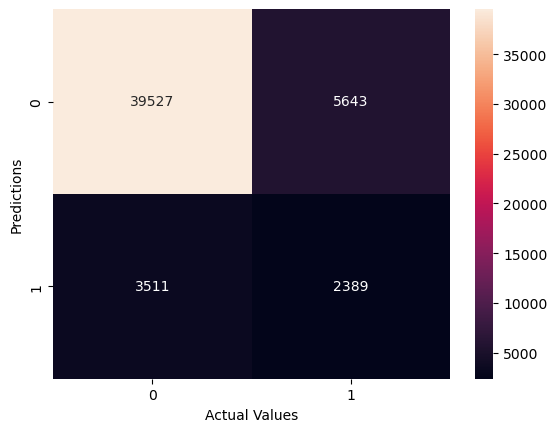

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0    0.91767   0.87943   0.89814     45170
           1    0.30018   0.39593   0.34147      5900

    accuracy                        0.82358     51070
   macro avg    0.60892   0.63768   0.61981     51070
weighted avg    0.84633   0.82358   0.83383     51070



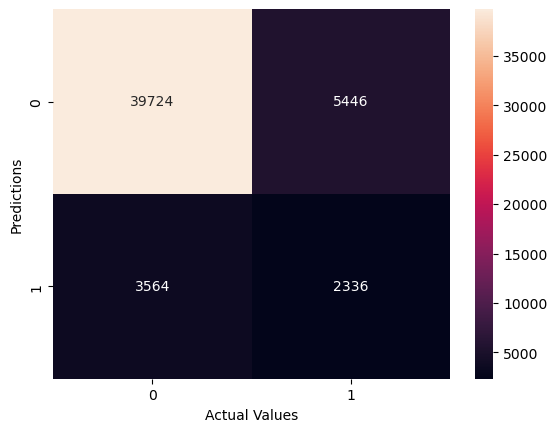

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0    0.89502   0.89351   0.89427     45170
           1    0.19511   0.19763   0.19636      5900

    accuracy                        0.81312     51070
   macro avg    0.54507   0.54557   0.54531     51070
weighted avg    0.81416   0.81312   0.81364     51070



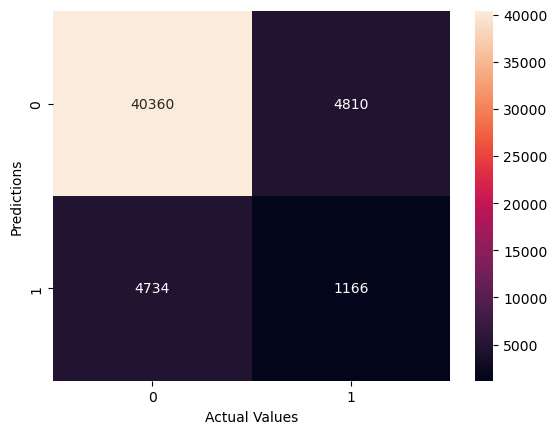

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0    0.88921   0.99331   0.93839     45170
           1    0.50654   0.05254   0.09521      5900

    accuracy                        0.88463     51070
   macro avg    0.69788   0.52293   0.51680     51070
weighted avg    0.84500   0.88463   0.84098     51070



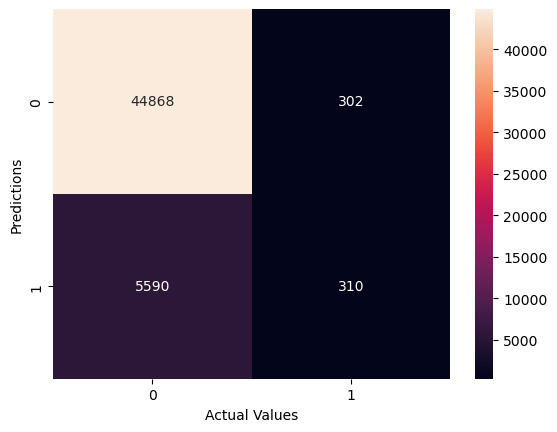

In [225]:
# Train and Evaluate the model with our top 5 feature importance

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model = classifier[0]
    model_name = classifier[1]
    model.fit(Xtrain_top_five_scaled, y_train)
    predictions = model.predict(Xtest_top_five_scaled)
    report = classification_report(y_test, predictions, digits = 5)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    
    plt.show()

Insight: After training the models with the top 5 features selected using random forest feature importance, the `Random Forest model` `performed best` with `44,868` True Negatives `(TN)`, `302` True Positives `(TP)`, `5,590` False Negatives `(FN)`, and `310` False Positives `(FP)`, showing superior accuracy in predicting positive cases and minimizing errors.

### 7. Automating the Process of Model Tuning (Hyperparameter Tuning) 
- Selecting the Best Classifiers (parameters) to Build Model

##### How can I automate this process of selecting the best parameters to train my model ?

In [226]:
# Create Hyperparameter tuning
myparamgrids = {
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [5, 10, 7],
    'class_weight': [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]
}

In [229]:
# Initializing Grid Search
grid_search = GridSearchCV(estimator=classifiers[3][0], param_grid=myparamgrids, cv=5, scoring='recall')

In [ ]:
# Train the Model
grid_search.fit(X_train_scaled, y_train)

In [228]:
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'class_weight': {0: 1, 1: 4}, 'max_depth': 20, 'min_samples_split': 10}


### Best Decision Tree Model ###
Classification Report:
               precision    recall  f1-score   support

           0    0.90232   0.82743   0.86325     45170
           1    0.19214   0.31424   0.23847      5900

    accuracy                        0.76814     51070
   macro avg    0.54723   0.57083   0.55086     51070
weighted avg    0.82028   0.76814   0.79107     51070



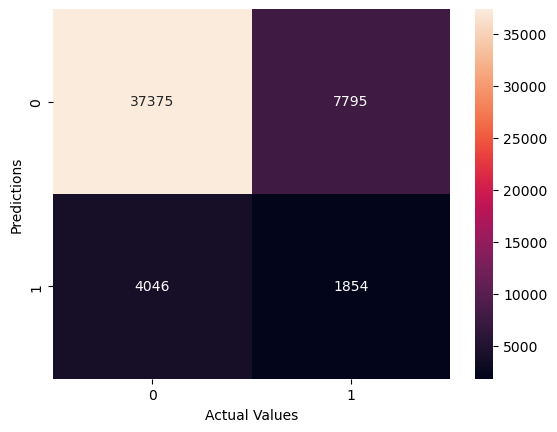

In [208]:
# Evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

report = classification_report(y_test, predictions, digits = 5)
matrix = confusion_matrix(y_test, predictions)

# Display results
print("### Best Decision Tree Model ###")
print("Classification Report:\n", report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
    
plt.show()

Insight: After hyperparameter tuning, the Decision Tree Classifier was the top performer, with 37,375 True Negatives (TN), 1,854 True Positives (TP), 4,046 False Negatives (FN), and 7,795 False Positives (FP).